In [8]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;

In [9]:
df = pd.read_csv(r"C:\Users\U S E R\Downloads\Insurance policies-20250620T063302Z-1-001\Copy of Insurance Policies.csv")

In [12]:
df.head(60)

,ID,birthdate,age,marital_status,car_use,gender,kids_driving,parent,education,car_make,car_model,car_color,car_year,claim_freq,coverage_zone,claim_amt,household_income,education_level_encoded,age_group
0,62-2999778,1962-08-09,62,Single,Private,Male,2,Yes,High School,Acura,TSX,Green,2010,1,Highly Urban,73759.88,220436.66,0,60s
1,70-2426103,1988-04-21,37,Married,Private,Female,0,No,Bachelors,Corbin,Sparrow,Turquoise,2004,1,Urban,78975.41,66491.43,1,30s
2,08-3808219,1999-03-08,26,Divorced,Private,Male,0,No,Bachelors,Nissan,Pathfinder,Orange,1993,0,Rural,30904.01,56122.70,1,20s
3,38-0306843,1959-05-10,66,Single,Private,Female,0,No,Bachelors,Ford,Econoline E350,Pink,2000,1,Highly Urban,30257.82,175182.61,1,60s
4,47-5163637,1992-01-15,33,Single,Commercial,Male,0,No,Masters,Nissan,350Z,Green,2006,3,Rural,50434.02,137110.23,2,30s
5,07-4760971,1963-11-06,61,Single,Private,Male,1,Yes,PhD,Mercedes-Benz,CLK-Class,Maroon,1999,3,Rural,71935.14,212072.46,3,60s
6,36-8207139,1999-08-27,25,Single,Private,Male,0,No,High School,Toyota,Matrix,Yellow,2006,0,Rural,21611.15,87875.66,0,20s
7,57-6123340,1980-02-26,45,Married,Private,Male,0,No,Bachelors,Lincoln,Continental Mark VII,Crimson,1989,2,Highly Rural,24447.74,167681.37,1,40s
8,47-9063798,1950-10-06,74,Single,Private,Male,2,Yes,High School,Mazda,323,Goldenrod,1995,0,Rural,40437.12,116304.98,0,70+
9,92-8406214,1992-12-18,32,Single,Private,Female,0,No,High School,Ford,F350,Red,1994,0,Suburban,32119.83,111742.45,0,30s


### encoding education level

In [14]:
df['education_level_encoded'] = df['education'].map(
    {'High School': 0, 
     'Bachelors': 1,
   'Masters':2,
   'PhD':3 }
)
df['claim_amt'] = df['claim_amt'].replace('[\$,]', '', regex=True).astype(float)
df['household_income'] = df['household_income'].replace('[\$,]', '', regex=True).astype(float)

<>:7: SyntaxWarning: invalid escape sequence '\$'
<>:8: SyntaxWarning: invalid escape sequence '\$'
<>:7: SyntaxWarning: invalid escape sequence '\$'
<>:8: SyntaxWarning: invalid escape sequence '\$'
C:\Users\U S E R\AppData\Local\Temp\ipykernel_12880\2351686542.py:7: SyntaxWarning: invalid escape sequence '\$'
  df['claim_amt'] = df['claim_amt'].replace('[\$,]', '', regex=True).astype(float)
C:\Users\U S E R\AppData\Local\Temp\ipykernel_12880\2351686542.py:8: SyntaxWarning: invalid escape sequence '\$'
  df['household_income'] = df['household_income'].replace('[\$,]', '', regex=True).astype(float)


### creating bins 

In [16]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')

def assign_age_group(age):
    if pd.isnull(age):
        return 'Unknown'
    elif age >= 70:
        return '70+'
    elif age >= 60:
        return '60s'
    elif age >= 50:
        return '50s'
    elif age >= 40:
        return '40s'
    elif age >= 30:
        return '30s'
    elif age >= 20:
        return '20s'
    else:
        return 'Below 20'

df['age_group'] = df['age'].apply(assign_age_group)

# Optional: check result
print(df[['age', 'age_group']].head())

# Save updated DataFrame (if needed)
df.to_csv(r"C:\Users\U S E R\Downloads\Insurance policies-20250620T063302Z-1-001\Copy of Insurance Policies.csv", index=False)


   age age_group
0   62       60s
1   37       30s
2   26       20s
3   66       60s
4   33       30s


### 2. Impact of Education on Claim Amount:


In [18]:
correlation = df['claim_amt'].corr(df['education_level_encoded'])
print("there is no correlation because the correlation is",correlation )


there is no correlation because the correlation is 0.0028093839046472633


### 4. Income Level and Claim Behavior:

In [20]:
#income by claim frequency 
correlation = df['claim_freq'].corr(df['household_income'])
print("there is no correlation because the correlation is",correlation )

there is no correlation because the correlation is -0.0006334720465573461


In [22]:
#their pvalue
corr_spearman = df['claim_freq'].corr(df['household_income'], method='spearman')
print("Spearman correlation:", corr_spearman)


Spearman correlation: -0.002532693559566707


In [43]:
#income by claim amt
correlation = df['claim_amt'].corr(df['household_income'])
print("there is no correlation very little negative relationship because the correlation is",correlation )

there is no correlation very little negative relationship because the correlation is -0.0046889196777701375


### 6. Kids Driving Influence on Claims:

In [26]:

df[['kids_driving', 'claim_amt', 'claim_freq']].corr()


,kids_driving,claim_amt,claim_freq
kids_driving,1.000000,0.000943,-0.002257
claim_amt,0.000943,1.000000,0.002058
claim_freq,-0.002257,0.002058,1.000000


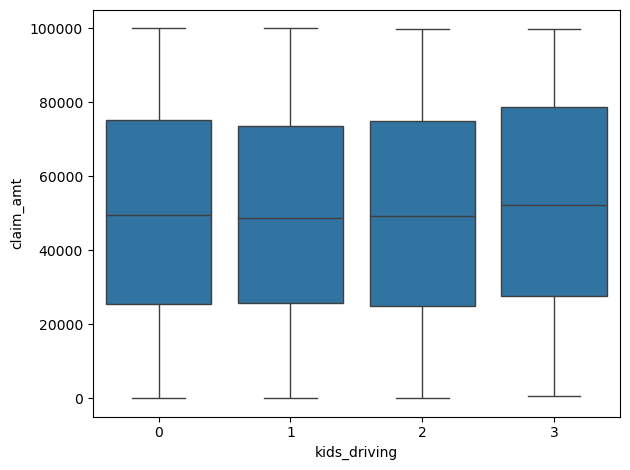

In [30]:
sns.boxplot(x='kids_driving', y='claim_amt', data=df)
plt.tight_layout()
plt.show()


### 8. Age of Car and Claim Patterns:


In [53]:
df[['car_year', 'claim_amt', 'claim_freq']].corr()


,car_year,claim_amt,claim_freq
car_year,1.000000,0.001201,0.003846
claim_amt,0.001201,1.000000,0.002058
claim_freq,0.003846,0.002058,1.000000


### 9. Claims by Car Color:


In [55]:
# Group by color and calculate mean
color_stats = df.groupby('car_color')[['claim_amt', 'claim_freq']].mean().reset_index()

# Sort by claim amount (descending)
color_stats = color_stats.sort_values('claim_amt', ascending=False)

print(color_stats)


     car_color     claim_amt  claim_freq
2      Crimson  51365.199940    0.504020
5        Green  50821.187138    0.525298
16   Turquoise  50818.501400    0.500962
3       Fuscia  50398.141540    0.498480
12        Puce  50303.123385    0.511043
1         Blue  50228.885465    0.517483
14         Red  50206.591963    0.509434
13      Purple  50094.623986    0.539135
6       Indigo  50009.648717    0.552808
7        Khaki  50001.220778    0.492725
18      Yellow  49987.851629    0.476046
0   Aquamarine  49809.069460    0.541584
15        Teal  49791.205974    0.512898
11        Pink  49705.213471    0.490303
4    Goldenrod  49659.884568    0.531266
17      Violet  49645.033947    0.516340
10      Orange  49587.946172    0.508094
9         Mauv  49412.230449    0.482236
8       Maroon  48590.878337    0.486182


<Axes: xlabel='car_color', ylabel='claim_amt'>

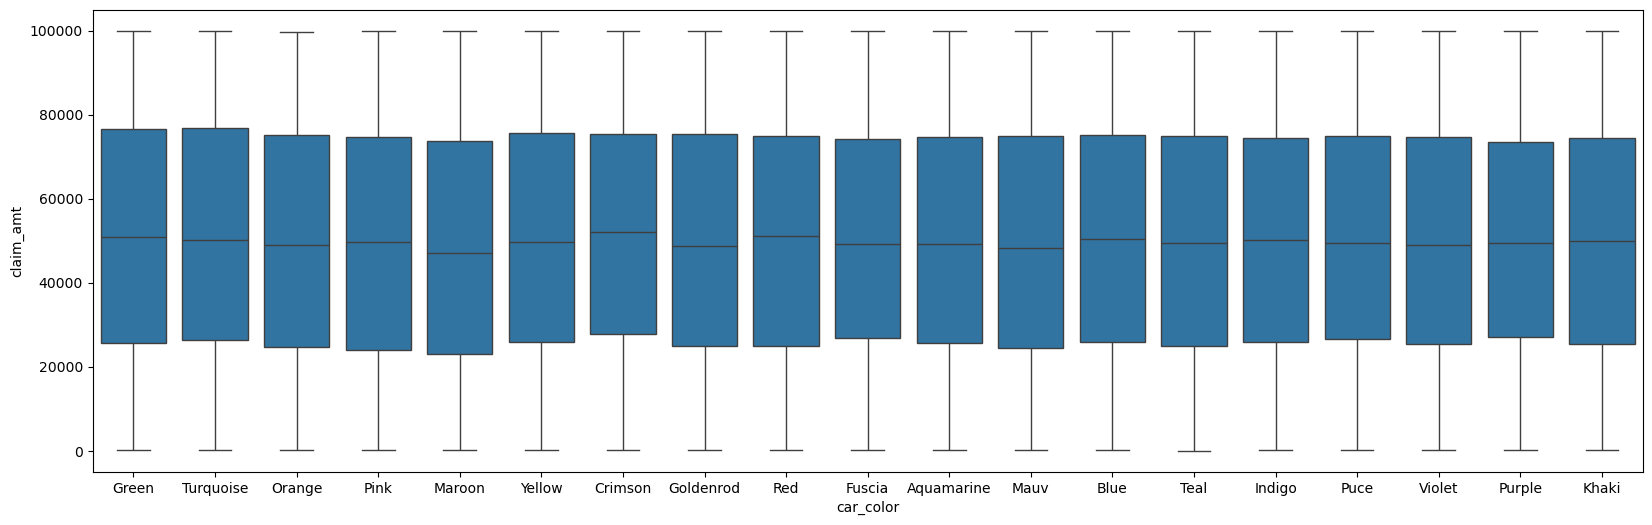

In [38]:

plt.figure(figsize=(20, 6))
sns.boxplot(data=df, x='car_color', y='claim_amt')


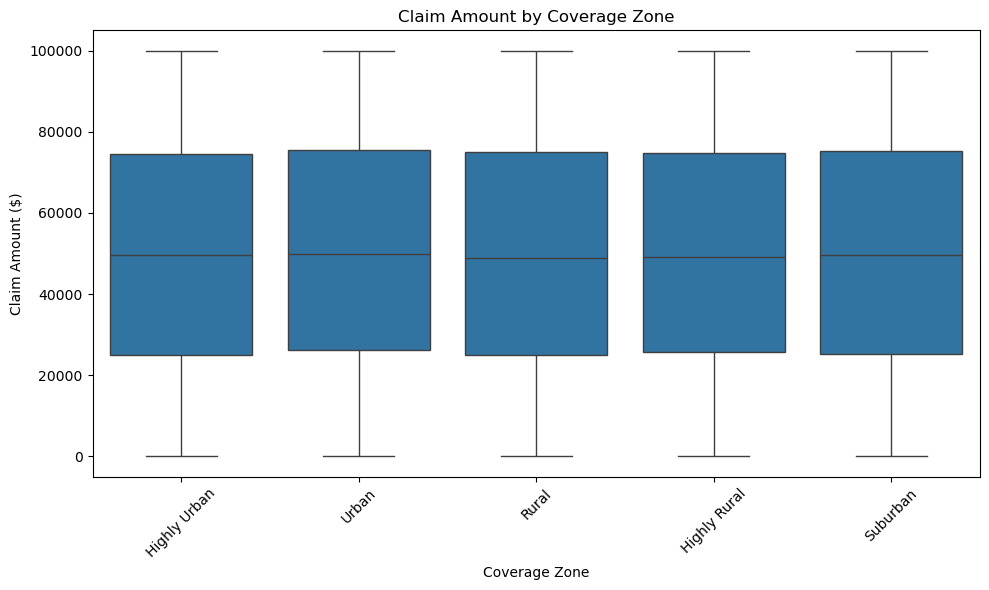

In [65]:


# Adjust the figure size (optional)
plt.figure(figsize=(10, 6))

# Create the box plot
sns.boxplot(x='coverage_zone', y='claim_amt', data=df)

# Add title and labels
plt.title('Claim Amount by Coverage Zone')
plt.xlabel('Coverage Zone')
plt.ylabel('Claim Amount ($)')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()
